In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split

# Creating a Dataset

In [113]:
X, y = make_classification(
    n_samples=1000,        
    n_features=2,         
    n_informative=2,      
    n_redundant=0,        
    n_clusters_per_class=1, 
    random_state=100       
)

In [114]:
print(f"First 5 features of X:\n{X[:5]}\n")
print(f"First 5 features of Y:\n{y[:5]}")

First 5 features of X:
[[ 0.58838794  0.69888078]
 [ 0.96982181 -0.97997281]
 [ 1.71954863 -1.5010239 ]
 [-4.07151781 -0.09578941]
 [ 1.31354432 -0.41454983]]

First 5 features of Y:
[0 1 1 0 1]


In [115]:
dataset = pd.DataFrame({"X1":X[:,0], "X2":X[:,1], "label":y})

In [116]:
dataset.head()

,X1,X2,label
0,0.588388,0.698881,0
1,0.969822,-0.979973,1
2,1.719549,-1.501024,1
3,-4.071518,-0.095789,0
4,1.313544,-0.414550,1


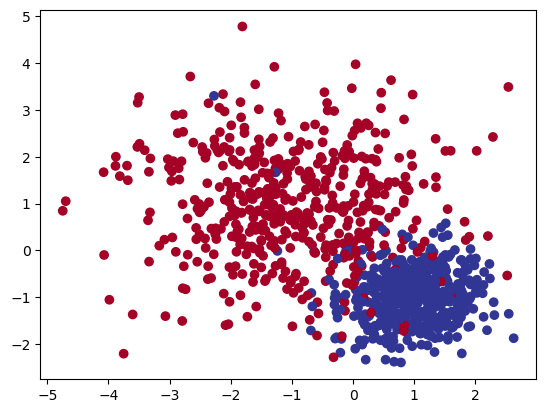

In [117]:
plt.scatter(x=X[:,0],y=X[:,1],c=y,cmap=plt.cm.RdYlBu);

In [118]:
X.shape,y.shape

((1000, 2), (1000,))

In [119]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=42)

# Implementing Neural Network

In [120]:
class NeuralNetwork:
    def __init__(self,input_size,hidden_size_1,hidden_size_2, output_size, learning_rate = 0.01):
        self.input_size = input_size
        self.hidden_size_1 = hidden_size_1
        self.hidden_size_2 = hidden_size_2
        self.output_size = output_size
        self.learning_rate = learning_rate
               
        self.train_loss = []
        self.test_loss = []
            
        # Parameter initializations
        # For Layer-1
        self.weights1 = np.random.randn(self.input_size,self.hidden_size_1) * 0.01
        self.biases1 = np.zeros((1,self.hidden_size_1))
        
        # For Layer-2
        self.weights2 = np.random.randn(self.hidden_size_1,self.hidden_size_2) * 0.01
        self.biases2 = np.zeros((1,self.hidden_size_2))
        
        # For Output Layer
        self.weights3 = np.random.randn(self.hidden_size_2,self.output_size) * 0.01
        self.biases3 = np.zeros((1,self.output_size))
        
    def __str__(self):
        return f"Neural Network Layout:\n\nInput Layer: {self.input_size} neurons\nHidden Layer 1: {self.hidden_size_1} neurons\nHidden Layer 2: {self.hidden_size_2} neurons\nOutput Layer: {self.output_size} neurons\nLoss Function: BCE"
    
    def sigmoid(self,x):
        x = np.clip(x, -500, 500)  # Prevent overflow
        return 1 / (1 + np.exp(-x))

    
    def relu(self,x):
        return np.maximum(0,x)
    
    def relu_derivative(self,x):
        return np.where(x>0,1,0)
    
    def log_loss(self,y_true,y_pred):
        epsilon = 1e-15
        y_pred = np.clip(y_pred,epsilon,1-epsilon)
        return -np.mean(y_true*np.log(y_pred) + (1 - y_true) * np.log(1 - y_pred))
    
    def forward(self,X):
        # Layer 1
        self.z1 = np.dot(X,self.weights1) + self.biases1
        self.a1 = self.relu(self.z1)
        
        # Layer 2
        self.z2 = np.dot(self.a1, self.weights2) + self.biases2
        self.a2 = self.relu(self.z2)
        
        # Output Layer
        self.z3 = np.dot(self.a2,self.weights3) + self.biases3
        self.a3 = self.sigmoid(self.z3)
        
        return self.a3
    
    def backpropagate(self,X,y):
        m = X.shape[0]
        
        # Output Layer error
        dz3 = self.a3 - y.reshape(-1,1)
        dw3 = np.dot(self.a2.T, dz3) / m
        db3 = np.sum(dz3,axis=0,keepdims=True) / m
        
        # Layer 2 error
        dz2 = np.dot(dz3,self.weights3.T) * self.relu_derivative(self.z2)
        dw2 = np.dot(self.a1.T,dz2) / m
        db2 = np.sum(dz2, axis=0, keepdims=True) /m
        
        # Layer 1 error
        dz1 = np.dot(dz2, self.weights2.T) * self.relu_derivative(self.z1)
        dw1 = np.dot(X.T, dz1) / m
        db1 = np.sum(dz1, axis=0, keepdims=True) / m
        
        # Updating parameters using Gradient Descent
        self.weights3 -= self.learning_rate * dw3
        self.biases3 -= self.learning_rate * db3
        self.weights2 -= self.learning_rate * dw2
        self.biases2 -= self.learning_rate * db2
        self.weights1 -= self.learning_rate * dw1
        self.biases1 -= self.learning_rate * db1
        
    def train(self,X,y,epochs=100):
        for epoch in range(epochs):
            # Forward pass
            y_pred = self.forward(X)
            
            # Compute Loss
            loss = self.log_loss(y,y_pred)
            self.train_loss.append(loss)
            
            # Backpropagation
            self.backpropagate(X,y)
            
            if epoch % 10 == 0:
                print(f"Epoch: {epoch} | Train Loss: {loss}")
    
    def test(self,X,y,epochs=100):
        for epoch in range(epochs):
            # Forward pass
            y_pred = self.forward(X)

            # Compute Loss
            loss = self.log_loss(y,y_pred)
            self.test_loss.append(loss)
            
            if epoch % 10 == 0:
                print(f"Epoch: {epoch} | Test Loss: {loss}")

In [121]:
NN = NeuralNetwork(input_size=2,hidden_size_1=4,hidden_size_2=3,output_size=1,learning_rate=0.001)
print(NN)

Neural Network Layout:

Input Layer: 2 neurons
Hidden Layer 1: 4 neurons
Hidden Layer 2: 3 neurons
Output Layer: 1 neurons
Loss Function: BCE


In [122]:
NN.train(X_train,y_train,epochs=200)

Epoch: 0 | Train Loss: 0.6931471835970604
Epoch: 10 | Train Loss: 0.693144549814911
Epoch: 20 | Train Loss: 0.6931419291806133
Epoch: 30 | Train Loss: 0.6931393216069875
Epoch: 40 | Train Loss: 0.6931367270238769
Epoch: 50 | Train Loss: 0.6931341453763743
Epoch: 60 | Train Loss: 0.6931315765811117
Epoch: 70 | Train Loss: 0.693129020594467
Epoch: 80 | Train Loss: 0.6931264773532514
Epoch: 90 | Train Loss: 0.6931239467966877
Epoch: 100 | Train Loss: 0.6931214288574931
Epoch: 110 | Train Loss: 0.6931189234773071
Epoch: 120 | Train Loss: 0.6931164305924165
Epoch: 130 | Train Loss: 0.6931139501307115
Epoch: 140 | Train Loss: 0.6931114820275646
Epoch: 150 | Train Loss: 0.6931090262266351
Epoch: 160 | Train Loss: 0.6931065826752231
Epoch: 170 | Train Loss: 0.6931041513172731
Epoch: 180 | Train Loss: 0.693101732090069
Epoch: 190 | Train Loss: 0.6930993249279113


In [123]:
NN.test(X_test,y_test,epochs=200)

Epoch: 0 | Test Loss: 0.693338607679734
Epoch: 10 | Test Loss: 0.693338607679734
Epoch: 20 | Test Loss: 0.693338607679734
Epoch: 30 | Test Loss: 0.693338607679734
Epoch: 40 | Test Loss: 0.693338607679734
Epoch: 50 | Test Loss: 0.693338607679734
Epoch: 60 | Test Loss: 0.693338607679734
Epoch: 70 | Test Loss: 0.693338607679734
Epoch: 80 | Test Loss: 0.693338607679734
Epoch: 90 | Test Loss: 0.693338607679734
Epoch: 100 | Test Loss: 0.693338607679734
Epoch: 110 | Test Loss: 0.693338607679734
Epoch: 120 | Test Loss: 0.693338607679734
Epoch: 130 | Test Loss: 0.693338607679734
Epoch: 140 | Test Loss: 0.693338607679734
Epoch: 150 | Test Loss: 0.693338607679734
Epoch: 160 | Test Loss: 0.693338607679734
Epoch: 170 | Test Loss: 0.693338607679734
Epoch: 180 | Test Loss: 0.693338607679734
Epoch: 190 | Test Loss: 0.693338607679734


In [124]:
epochs = []
for i in range(200):
    epochs.append(i)

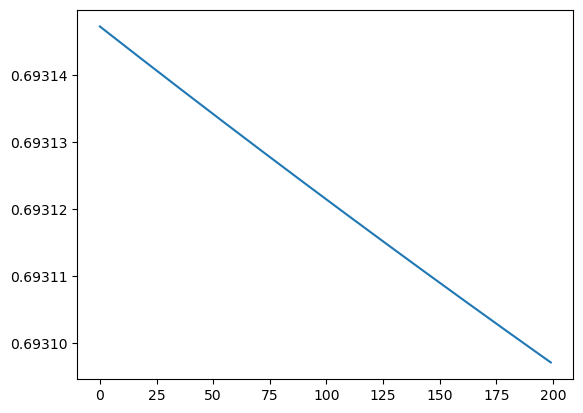

In [125]:
plt.plot(epochs,NN.train_loss)

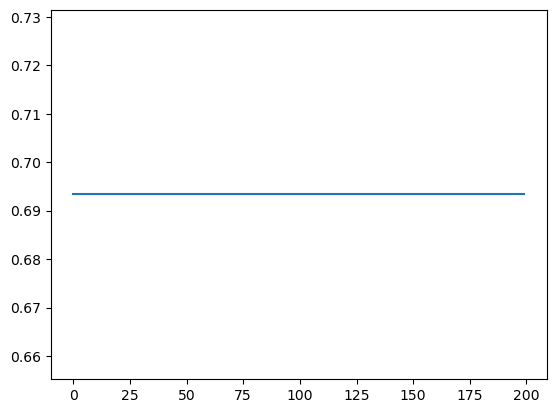

In [126]:
plt.plot(epochs,NN.test_loss)